In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd

from io import BytesIO
from scipy import signal, ndimage
from scipy.signal import spectrogram
from scipy.signal import welch  # For spectrogram calculation
from scipy.signal import butter, filtfilt  # For filtering
from mne.preprocessing import compute_proj_ecg

In [2]:
epilepsy = "epilepsy/aaaaaanr_s001_t001.edf"
no_epilepsy = "no_epilepsy/aaaaaebo_s002_t002.edf"

In [3]:
raw1 = mne.io.read_raw_edf(epilepsy, preload=True)
raw2 = mne.io.read_raw_edf(no_epilepsy, preload=True)

Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\epilepsy\aaaaaanr_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 303499  =      0.000 ...  1213.996 secs...
Extracting EDF parameters from d:\FGW\EDF\v2.0.1_new\no_epilepsy\aaaaaebo_s002_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 297499  =      0.000 ...  1189.996 secs...


In [4]:
raw1.filter(1,50, method="iir")
raw2.filter(1,50, method="iir")

# raw1.notch_filter(freqs=[5], method='iir')
# raw2.notch_filter(freqs=[5], method='iir')

raw1.notch_filter(freqs=[5, 10, 15, 20], method='fir')
raw2.notch_filter(freqs=[5, 10, 15, 20], method='fir')

ica = mne.preprocessing.ICA(n_components=4, max_iter='auto', random_state=0)
ica.fit(raw1)
ica.apply(raw1)

ica.fit(raw2)
ica.apply(raw2)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Fitting ICA to data using 33 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 1.2s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 33 PCA components
Fitting ICA to data using 36 channels (please be patient, this may take a while)


C:\Users\PC\AppData\Local\Temp\ipykernel_28360\2157710777.py:11: RuntimeWarning: Using n_components=4 (resulting in n_components_=4) may lead to an unstable mixing matrix estimation because the ratio between the largest (33) and smallest (4.4e-10) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 1
  ica.fit(raw1)


Selecting by number: 4 components
Fitting ICA took 1.6s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 36 PCA components


Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaaebo
Digitized points,Not available
Good channels,36 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


In [5]:
sfreq1 = raw1.info['sfreq']
sfreq2 = raw2.info['sfreq']

In [6]:
channel_index = 4

eeg_data_epilepsy = raw1.get_data(picks=channel_index)[0]
eeg_data_no_epilepsy = raw2.get_data(picks=channel_index)[0]

In [7]:
freqs1, time1, spec1 = signal.spectrogram(eeg_data_epilepsy, fs=sfreq1)
freqs2, time2, spec2 = signal.spectrogram(eeg_data_no_epilepsy, fs=sfreq2)

In [12]:
freqs3, time3, spec3 = signal.spectrogram(eeg, fs=fs)

In [ ]:
time = 250

freqs1, time1, spec1 = signal.spectrogram(eeg_data_epilepsy[:int(time * sfreq1)], fs=sfreq1)
freqs2, time2, spec2 = signal.spectrogram(eeg_data_no_epilepsy[:int(time * sfreq2)], fs=sfreq2)

In [ ]:
freqs1, time1, spec1 = signal.spectrogram(eeg_data_epilepsy, fs=sfreq1)
freqs2, time2, spec2 = signal.spectrogram(eeg_data_no_epilepsy, fs=sfreq2)

Text(0.5, 1.0, 'Spectrogram of EEG Channel (No Epilepsy)')

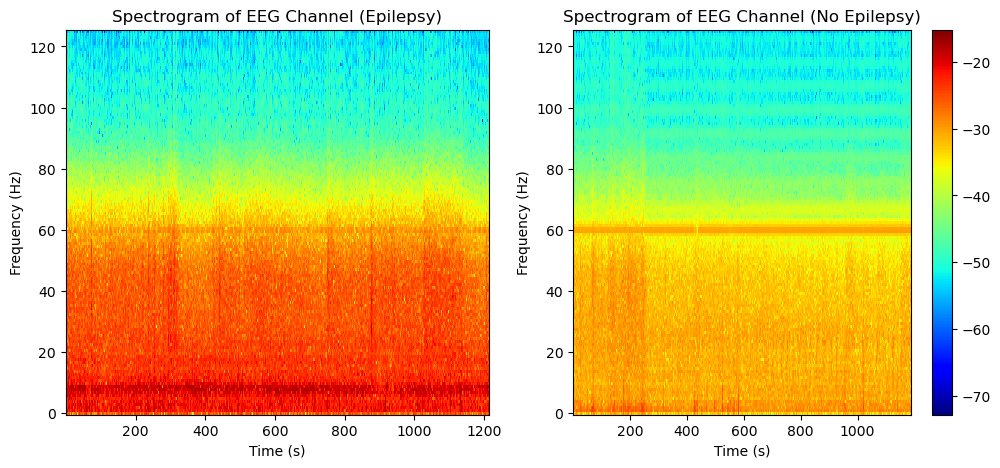

In [18]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1) 
plt.pcolormesh(time1, freqs1, np.log(spec1), cmap='jet')
#PiYG, RdYlGn, RdBu
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Channel (Epilepsy)')

ax2 = plt.subplot(1, 2, 2) 
plt.pcolormesh(time2, freqs2, np.log(spec2), cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.title('Spectrogram of EEG Channel (No Epilepsy)')

In [27]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [10]:
freq_idx = np.where((freqs1 >= 40) & (freqs1 <= 80))[0]

Text(0.5, 1.0, 'Spectrogram of EEG Channel (No Epilepsy)')

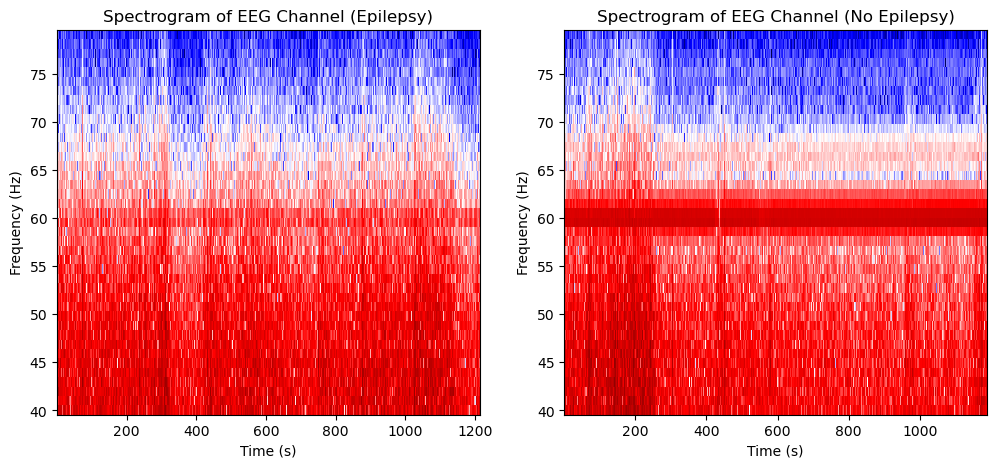

In [12]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1) 
plt.pcolormesh(time1, freqs1[freq_idx], np.log(spec1[freq_idx, :]), cmap='seismic')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Channel (Epilepsy)')

ax2 = plt.subplot(1, 2, 2) 
plt.pcolormesh(time2, freqs2[freq_idx], np.log(spec2[freq_idx, :]), cmap='seismic')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Channel (No Epilepsy)')

In [17]:
freq_idx = np.where((freqs1 >= 59) & (freqs1 <= 61))[0]

In [70]:
time_idx = np.where((time1 >= 500) & (time1 <= 700))[0]

Text(0.5, 1.0, 'Spectrogram of EEG Channel (No Epilepsy)')

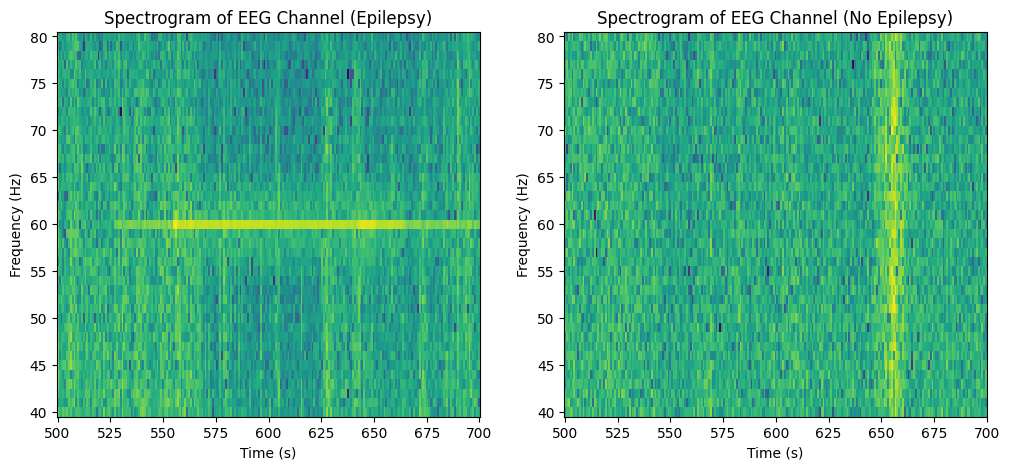

In [71]:
freq_idx, time_idx = np.meshgrid(freq_idx, time_idx)

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1) 
plt.pcolormesh(time1[time_idx], freqs1[freq_idx], np.log(spec1[freq_idx, time_idx]))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Channel (Epilepsy)')

ax2 = plt.subplot(1, 2, 2) 
plt.pcolormesh(time2[time_idx], freqs2[freq_idx], np.log(spec2[freq_idx, time_idx]))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG Channel (No Epilepsy)')